## TPC-H BigQuery Import  
Import data from GCS to a previously created BigQuery dataset

In [1]:
import config, schema, bq, load

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_rows", 1000)

In [4]:
from importlib import reload

### I. TPC-H 1GB - basic, no config

In [5]:
dataset_name = 'h_1GB_1_basic'

In [6]:
ddl_filepath = config.fp_h_output + config.sep + dataset_name + ".ddl"

In [7]:
schema.rewrite_h_basic(filepath_out=ddl_filepath,
                       dataset_name=dataset_name)

In [8]:
bq.create_dataset(dataset_name=dataset_name)

Dataset(DatasetReference('tpc-benchmarking-9432', 'h_1GB_1_basic'))

In [9]:
bq.create_schema(schema_file=ddl_filepath)

In [10]:
# set n to about 5, high numbers run afoul of BQ's upload limits
# i.e. 403 - rateLimitExceeded
# https://cloud.google.com/bigquery/docs/error-messages
u = load.BQPooledUpload(dataset_name=dataset_name,
                        test="h", scale=1, n=5)
u.verbose = True

In [11]:
u.df

,chunk_name,url,size_bytes,uri,test,scale,table,n,t0,t1,done,file_n
0,h_1GB_customer.tbl.1,https://storage.googleapis.com/tpc-benchmark-5...,2006585,gs://tpc-benchmark-5947/h_1GB_customer.tbl.1,h,1GB,customer,1,,,,94
1,h_1GB_customer.tbl.10,https://storage.googleapis.com/tpc-benchmark-5...,2027260,gs://tpc-benchmark-5947/h_1GB_customer.tbl.10,h,1GB,customer,10,,,,95
2,h_1GB_customer.tbl.11,https://storage.googleapis.com/tpc-benchmark-5...,2027008,gs://tpc-benchmark-5947/h_1GB_customer.tbl.11,h,1GB,customer,11,,,,96
3,h_1GB_customer.tbl.12,https://storage.googleapis.com/tpc-benchmark-5...,2024581,gs://tpc-benchmark-5947/h_1GB_customer.tbl.12,h,1GB,customer,12,,,,97
4,h_1GB_customer.tbl.2,https://storage.googleapis.com/tpc-benchmark-5...,2016188,gs://tpc-benchmark-5947/h_1GB_customer.tbl.2,h,1GB,customer,2,,,,98
5,h_1GB_customer.tbl.3,https://storage.googleapis.com/tpc-benchmark-5...,2015038,gs://tpc-benchmark-5947/h_1GB_customer.tbl.3,h,1GB,customer,3,,,,99
6,h_1GB_customer.tbl.4,https://storage.googleapis.com/tpc-benchmark-5...,2010122,gs://tpc-benchmark-5947/h_1GB_customer.tbl.4,h,1GB,customer,4,,,,100
7,h_1GB_customer.tbl.5,https://storage.googleapis.com/tpc-benchmark-5...,2009280,gs://tpc-benchmark-5947/h_1GB_customer.tbl.5,h,1GB,customer,5,,,,101
8,h_1GB_customer.tbl.6,https://storage.googleapis.com/tpc-benchmark-5...,2013729,gs://tpc-benchmark-5947/h_1GB_customer.tbl.6,h,1GB,customer,6,,,,102
9,h_1GB_customer.tbl.7,https://storage.googleapis.com/tpc-benchmark-5...,2007520,gs://tpc-benchmark-5947/h_1GB_customer.tbl.7,h,1GB,customer,7,,,,103


In [12]:
results = u.pipeline()

Starting job f852212d-d400-42c5-85e3-ca4518df86f9
Starting job 070ccc1a-2f11-47a6-a6f7-0dafcf52c6e9
Starting job 29e6356b-61f3-42cc-aa10-9ec08342732b
Starting job a0702c46-ff13-48cf-8c28-2c04dbb9e4c0
Starting job eae6215b-c98a-40e2-8cfa-cd5cf1486b0e
Job finished.
Loading: h_1GB_part.tbl.6
t0: 2020-04-08 15:14:43.047280
t1: 2020-04-08 15:14:48.731902
Done: True
------------------------------
Job finished.
Loading: h_1GB_customer.tbl.1
t0: 2020-04-08 15:14:43.042043
t1: 2020-04-08 15:14:49.367931
Done: True
------------------------------
Starting job 44004af1-0900-4a13-8cc7-de7143d71d8d
Starting job fd52d8d0-833c-4e35-bf94-7874349cf0f2
Job finished.
Loading: h_1GB_orders.tbl.3
t0: 2020-04-08 15:14:43.044960
t1: 2020-04-08 15:14:51.649835
Done: True
------------------------------
Starting job 8e57adba-2acb-4aeb-ad41-58af5bb343f8
Job finished.
Loading: h_1GB_partsupp.tbl.9
t0: 2020-04-08 15:14:43.045776
t1: 2020-04-08 15:14:52.658300
Done: True
------------------------------
Starting job 9

In [13]:
a = list(results)
a

[None, None, None, None, None]

In [14]:
dfx = pd.concat(u.up_data)
dfx.sort_index(inplace=True)

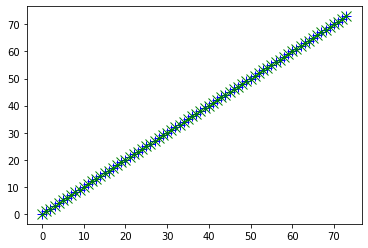

In [15]:
plt.plot(u.df.index, '+',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='blue');
plt.plot(dfx.index, 'x',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='green');

In [16]:
dfx[["chunk_name", "size_bytes", "table", "done", "MB/s"]]

,chunk_name,size_bytes,table,done,MB/s
0,h_1GB_customer.tbl.1,2006585,customer,True,0.367709
1,h_1GB_customer.tbl.10,2027260,customer,True,0.423486
2,h_1GB_customer.tbl.11,2027008,customer,True,0.271802
3,h_1GB_customer.tbl.12,2024581,customer,True,0.297264
4,h_1GB_customer.tbl.2,2016188,customer,True,0.267088
5,h_1GB_customer.tbl.3,2015038,customer,True,0.170852
6,h_1GB_customer.tbl.4,2010122,customer,True,0.517781
7,h_1GB_customer.tbl.5,2009280,customer,True,0.240696
8,h_1GB_customer.tbl.6,2013729,customer,True,0.208820
9,h_1GB_customer.tbl.7,2007520,customer,True,0.346542


### II. TPC-H 2GB - basic, no config

In [17]:
dataset_name = 'h_2GB_1_basic'

In [18]:
ddl_filepath = config.fp_h_output + config.sep + dataset_name + ".ddl"

In [19]:
schema.rewrite_h_basic(filepath_out=ddl_filepath,
                       dataset_name=dataset_name)

In [20]:
bq.create_dataset(dataset_name=dataset_name)

Dataset(DatasetReference('tpc-benchmarking-9432', 'h_2GB_1_basic'))

In [21]:
bq.create_schema(schema_file=ddl_filepath)

In [22]:
# set n to about 5, high numbers run afoul of BQ's upload limits
# i.e. 403 - rateLimitExceeded
# https://cloud.google.com/bigquery/docs/error-messages
u = load.BQPooledUpload(dataset_name=dataset_name,
                        test="h", scale=2, n=5)
u.verbose = True

In [23]:
results = u.pipeline()

Starting job f716c718-dd5f-4b37-9ffc-4c638c6f120a
Starting job 2b209980-d1dc-4cec-ad91-c08cfc051e9a
Starting job 53282134-1a26-4ee9-9bae-58459bf4ed33
Starting job bfbd2af6-4fa6-403b-ad23-438d951aa8d7
Starting job 2457b23a-1ec4-4b56-aeee-5efaf464913e
Job finished.
Loading: h_2GB_customer.tbl.1
t0: 2020-04-08 15:23:17.882982
t1: 2020-04-08 15:23:23.922595
Done: True
------------------------------
Starting job 80e71197-93b4-4d7f-ac3c-44c5822d1e7c
Job finished.
Loading: h_2GB_customer.tbl.1
t0: 2020-04-08 15:23:23.926272
t1: 2020-04-08 15:23:28.333070
Done: True
------------------------------
Starting job 1fe70e5d-09f5-4f6c-9bb4-ee2807b29df9
Job finished.
Loading: h_2GB_part.tbl.6
t0: 2020-04-08 15:23:17.887812
t1: 2020-04-08 15:23:29.654869
Done: True
------------------------------
Job finished.
Loading: h_2GB_partsupp.tbl.9
t0: 2020-04-08 15:23:17.890586
t1: 2020-04-08 15:23:30.102696
Done: True
------------------------------
Starting job 3bdeed51-9327-4d5d-be3e-3aed7e3f4687
Starting job

In [24]:
a = list(results)
a

[None, None, None, None, None]

In [25]:
dfx = pd.concat(u.up_data)
dfx.sort_index(inplace=True)

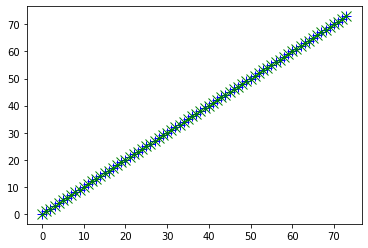

In [26]:
plt.plot(u.df.index, '+',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='blue');
plt.plot(dfx.index, 'x',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='green');

In [27]:
dfx[["chunk_name", "size_bytes", "table", "done", "MB/s"]]

,chunk_name,size_bytes,table,done,MB/s
0,h_2GB_customer.tbl.1,4022773,customer,True,0.870568
1,h_2GB_customer.tbl.10,4051399,customer,True,0.718614
2,h_2GB_customer.tbl.11,4050946,customer,True,0.993036
3,h_2GB_customer.tbl.12,4051156,customer,True,0.787902
4,h_2GB_customer.tbl.2,4025160,customer,True,0.654172
5,h_2GB_customer.tbl.3,4023009,customer,True,0.677234
6,h_2GB_customer.tbl.4,4021382,customer,True,0.523773
7,h_2GB_customer.tbl.5,4052231,customer,True,0.770720
8,h_2GB_customer.tbl.6,4051589,customer,True,1.137243
9,h_2GB_customer.tbl.7,4047082,customer,True,0.632027


In [28]:
break

SyntaxError: 'break' outside loop (<ipython-input-28-6aaf1f276005>, line 4)

### II. Validate Data Uploaded  

In [ ]:
reload(load)
valid_up = load.BQUpload(dataset_name=dataset_name, 
                        test="h", 
                        scale=1)

In [ ]:
valid_up.inventory_bucket()

In [ ]:
valid_up.compile_df()

In [ ]:
valid_up.inventory_data